In [ ]:
"""
This notebook is used to create visualizations of the clustered data. Because all of the data is now binary for presence/absence, a regular scatterplot
cannot be used because the only values availabe will be 1/0 which causes things like overplotting. This issue only gets worse because of the fact the
the StraboSpot data is high dimensional which distorts and misrepresents the data when plotted. If you were to use methods to plot high dimensional data 
to 2d represenations, like UMAP or t-SNE, you will just get a circle with no clear patters while also losing information due to dimensionality reduction. 
A heatmap is ideal for this data as it clearly shows distinctions and  patters using contrasting colors and is able to represent higher dimensions. 
"""

In [ ]:
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [10]:
df = pd.read_csv("../data/clustered_data.csv")

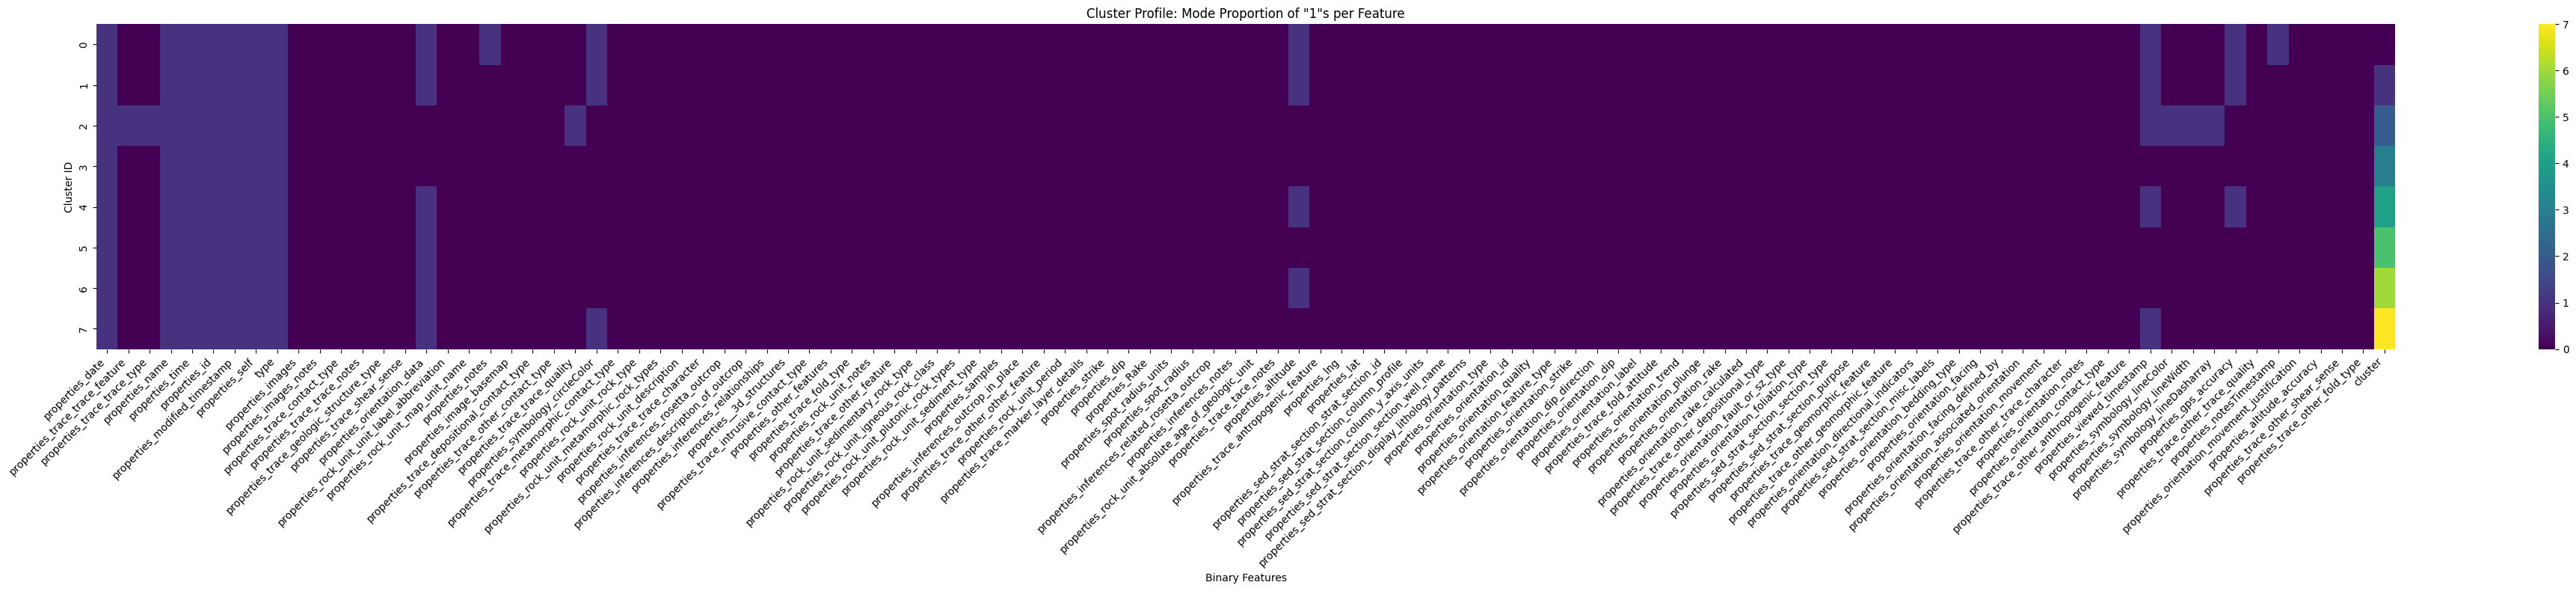

In [11]:
"""
This cell is used to create a heatmap of the clustered data across every feature and how they differ across the clusters. Something to notice is that
for nearly every single feature, the mode (as determined by the color) is identical across all of the clusters. If every single cluster has the same values,
the feature is not discriminative and can't be used to differentiate the clusters.
"""

cluster_profile = df.groupby('cluster')[df.columns.to_list()].agg(pd.Series.mode)

plt.figure(figsize=(40, 8)) 
sns.heatmap(
    cluster_profile,
    annot=False,  # Set to False, takes forever to compile and you can't even read
    cmap='viridis' 
)
plt.title('Cluster Profile: Mode Proportion of "1"s per Feature')
plt.xlabel('Binary Features')
plt.ylabel('Cluster ID')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
features = df.columns.tolist()[:-1] #does every feature in df except cluster

with open('../models/kmodes_model.pkl', 'rb') as f:
    km = pickle.load(f)
centroids = km.cluster_centroids_

In [13]:
"""
For most features, the modes of each cluster are identical, whether it be that a feature is present across all clusters or is missing. Because of this,
the features that are identical have no variance and therefore do not help to understand what features may be important. This cell is used to determine 
what what features have modes that differ across the clusters.
"""

unique_modes_features = []
for feature_idx, feature in enumerate(features):
    modes_across_clusters = [centroids[c][feature_idx] for c in range(len(centroids))]
    unique_modes = len(set(modes_across_clusters))
    if unique_modes > 1:
        unique_modes_features.append(feature)

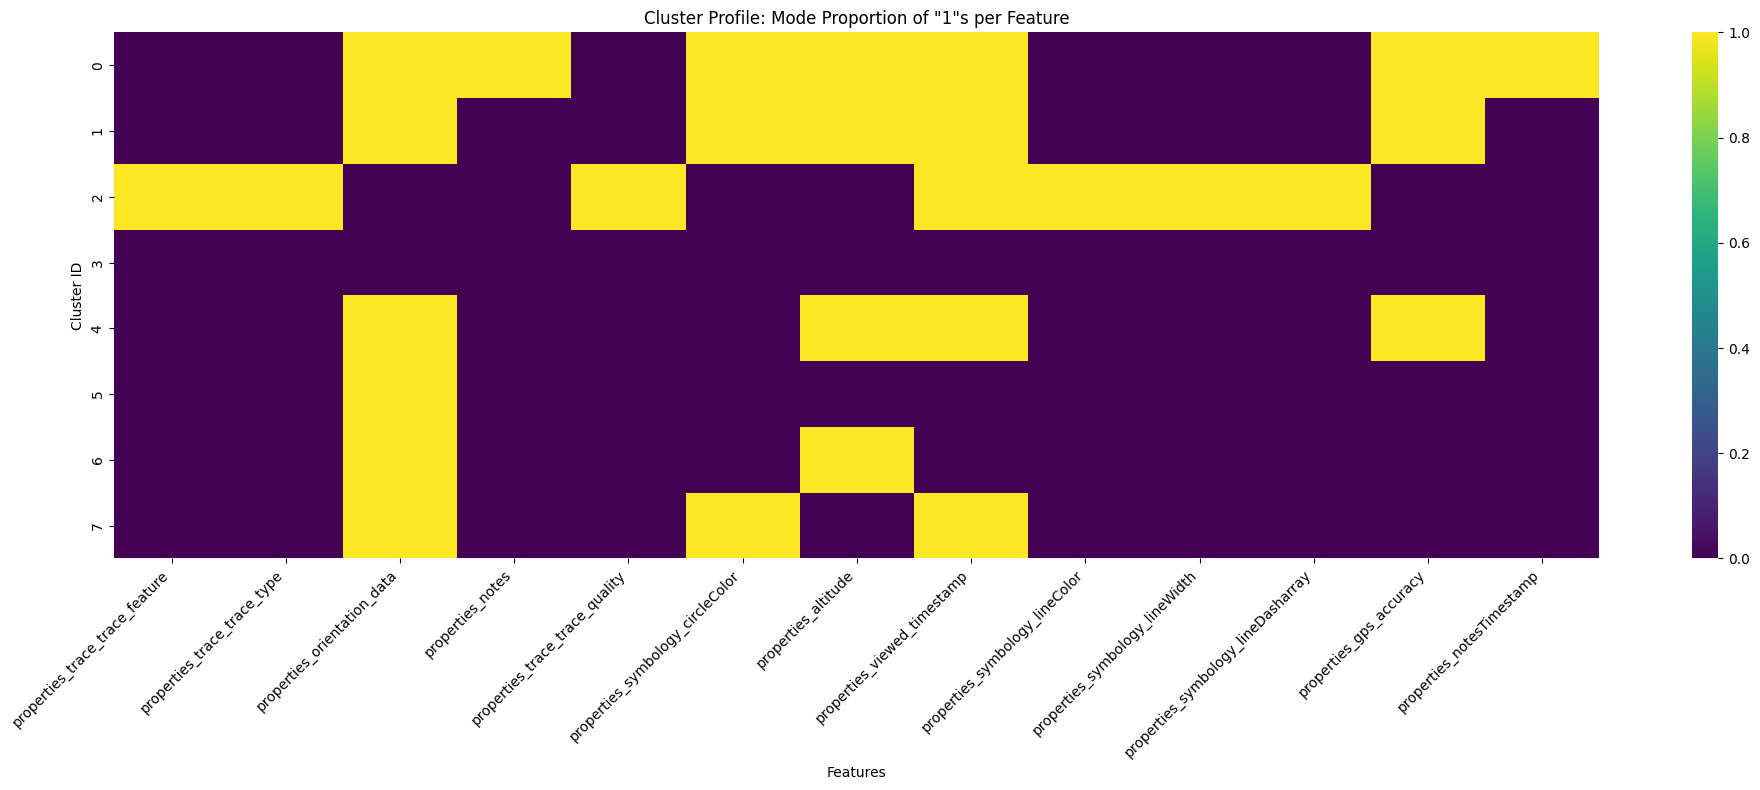

In [14]:
"""
This heatmap is a visualization of the data to show how the features differ across clusters. Only the features where they differ across clusters is used.
"""

cluster_profile = df.groupby('cluster')[unique_modes_features].agg(pd.Series.mode)

plt.figure(figsize=(20, 8)) 
sns.heatmap(
    cluster_profile,
    annot=False,  # Set to False, takes forever to compile and you can't even read
    cmap='viridis' 
)
plt.title('Cluster Profile: Mode Proportion of "1"s per Feature')
plt.xlabel('Features')
plt.ylabel('Cluster ID')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()